#**Análise de Dados Descritiva - Utilizando seaborn para análises gráficas**

### Análise de base de dados fictícia sobre gorjetas em restaurantes, no intuito de explorar a biblioteca seaborn utilizando as relações entre as variáveis de conta, gorjeta, dias da semana entre outros dados presentes no dataset.

## **Importando base de dados**


In [169]:
import pandas as pd

In [170]:
dados = pd.read_csv('tips.csv')
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


##**Tradução**

In [171]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [172]:
renomear = {
    'total_bill': 'valor_da_conta', 
    'tip' : 'gorjeta', 
    'dessert' : 'sobremesa', 
    'day': 'dia_da_semana', 
    'time': 'hora_do_dia', 
    'size': 'total_de_pessoas'}

In [173]:
gorjetas = dados.rename(columns = renomear)

In [174]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2


In [175]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [176]:
sim_nao = {
    'No' : 'Não', 
    'Yes' : 'Sim'
}

In [177]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [178]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2


In [179]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [180]:
hora = {
      'Dinner': 'Jantar', 
      'Lunch' : 'Almoço'
}

In [181]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)

In [182]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Jantar,2


In [183]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [184]:
dias = {
  'Sun' : 'Domingo',
  'Sat' : 'Sábado', 
  'Thur' : 'Quinta', 
  'Fri' : 'Sexta'
}

In [185]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [186]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


## **Importando o Seaborn**

In [187]:
!pip install seaborn==0.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [188]:
import seaborn as sns

In [189]:
!pip show seaborn

Name: seaborn
Version: 0.9.0
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: /usr/local/lib/python3.9/dist-packages
Requires: matplotlib, numpy, pandas, scipy
Required-by: missingno, pandas-profiling


## **Análise 1: Valor da conta e gorjeta**


In [190]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

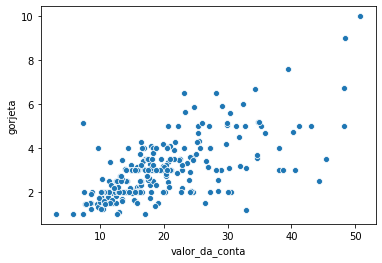

In [191]:
valor_gorjeta = sns.scatterplot(x ='valor_da_conta', y = 'gorjeta', data = gorjetas) 

**Visualmente o valor da gorjeta aumenta conforme aumenta o valor da conta**

In [192]:
print('A base de dados possui {} registros'.format(gorjetas.shape[0]))
print('Registros não nulos:')
gorjetas.count()   ##conta apenas valores não nulos

A base de dados possui 244 registros
Registros não nulos:


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

## **Criando o campo porcentagem**

In [193]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


In [194]:
gorjetas['porcentagem'] = (gorjetas['gorjeta'] / gorjetas['valor_da_conta']).round(2)

In [195]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06


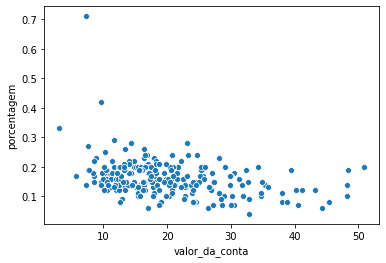

In [196]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y='porcentagem', data = gorjetas)

In [197]:
imagem = porcentagem_conta.get_figure()  
# para retornar novamente o gráfico é preciso usar a função "get_figure()" - usando apenas o nome da variável atribuida será retornado o endereço de memória


In [198]:
imagem.savefig('imagem.png')  ##salvando a imagem do gráfico

**Visualmente o valor da conta não é proporcional ao valor da gorjeta**

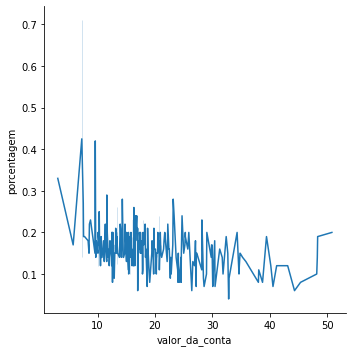

In [199]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', kind = 'line', data = gorjetas)

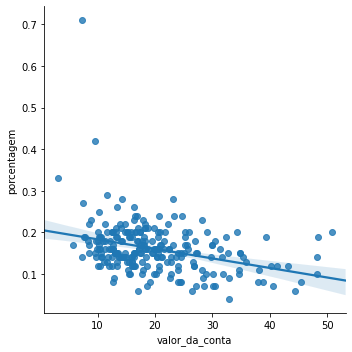

In [200]:
sns.lmplot(x='valor_da_conta', y='porcentagem', data = gorjetas)

## **Análise 2: Sobremesa** 

In [201]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06


In [202]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe().round(2)

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.00,93.00,93.00,93.00
mean,20.76,3.01,2.41,0.16
std,9.83,1.40,0.81,0.09
min,3.07,1.00,1.00,0.04
25%,13.42,2.00,2.00,0.11
50%,17.92,3.00,2.00,0.15
75%,26.86,3.68,3.00,0.20
max,50.81,10.00,5.00,0.71


In [203]:
gorjetas[gorjetas.sobremesa == 'Não'].describe().round(2)

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.00,151.00,151.00,151.00
mean,19.19,2.99,2.67,0.16
std,8.26,1.38,1.02,0.04
min,7.25,1.00,1.00,0.06
25%,13.32,2.00,2.00,0.14
50%,17.59,2.74,2.00,0.16
75%,22.76,3.50,3.00,0.18
max,48.33,9.00,6.00,0.29


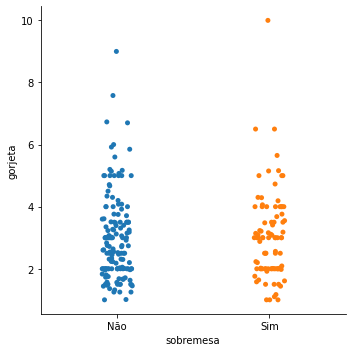

In [204]:
sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas)

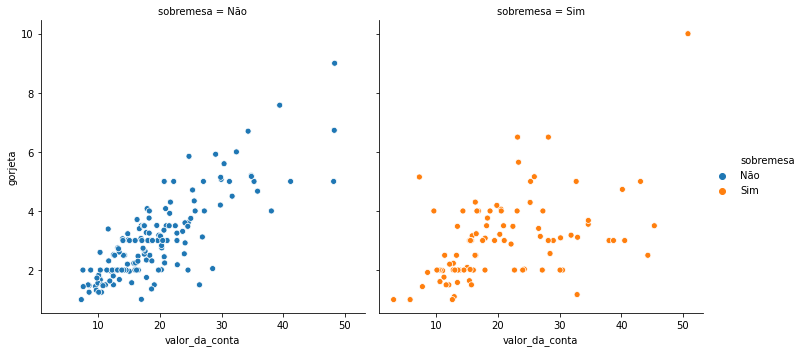

In [205]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue = 'sobremesa', col = 'sobremesa', data = gorjetas)

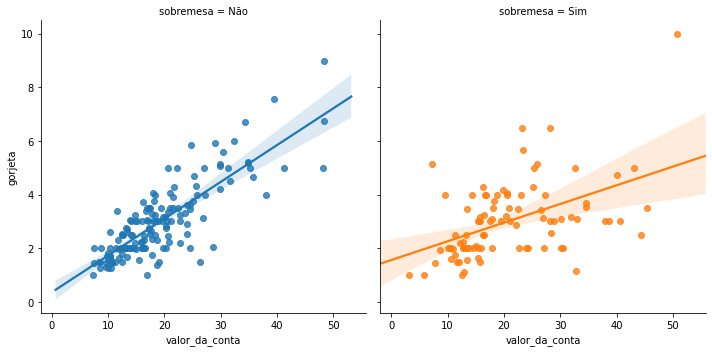

In [206]:
sns.lmplot(x='valor_da_conta', y='gorjeta', hue = 'sobremesa', col = 'sobremesa', data = gorjetas)

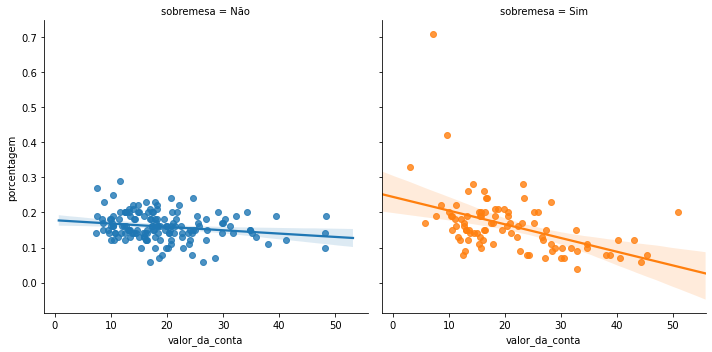

In [207]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue = 'sobremesa', col = 'sobremesa', data = gorjetas)

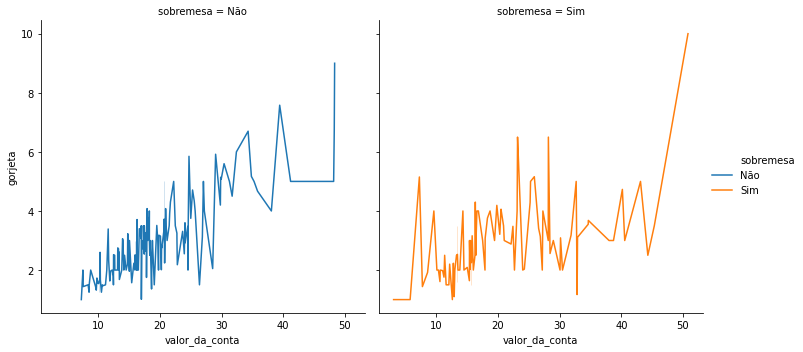

In [208]:
sns.relplot(x='valor_da_conta', y='gorjeta', col = 'sobremesa', hue ='sobremesa', kind = 'line', data = gorjetas)

**Visualmente existe uma diferença no valor da gorjeta dos clientes pediram e dos que não pediram sobremesa.**

### **Teste de Hipóteses**

**H<sup>0</sup>: A distribuição da taxa de gorjeta é a mesma nos dois grupos**

**H<sup>1</sup>: A distribuição da taxa de gorjeta não é a mesma nos dois grupos**

In [209]:
from scipy.stats import ranksums

In [210]:
sobremesa = gorjetas.query('sobremesa == "Sim" ').porcentagem

In [211]:
sem_sobremesa = gorjetas.query('sobremesa == "Não" ').porcentagem

In [212]:
r = ranksums(sobremesa, sem_sobremesa)

In [213]:
print('O valor do p-value é {}'.format(r.pvalue))

O valor do p-value é 0.5266635660124415


**A distribuição da taxa de gorjeta é a mesma nos dois grupos**

_O p-value representa a probabilidade daquela amostra ter acontecido dentro da população. Se a chance é pequena, geralmente p-value < 0,05, representa que um evento muito raro aconteceu, então optamos por descartar a hipótese nula, e dizer que ela pode não ser verdade._

## **Análise 3: Dia da semana**

In [214]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06


In [215]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

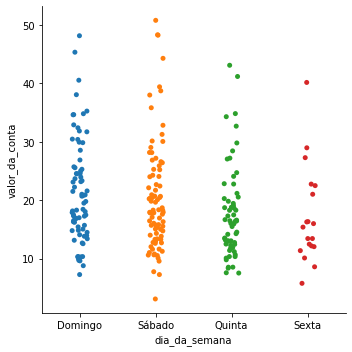

In [216]:
sns.catplot(x='dia_da_semana', y='valor_da_conta', data = gorjetas)

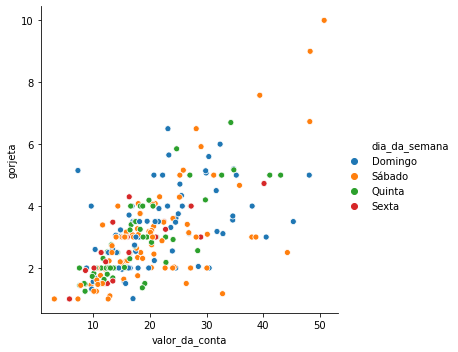

In [217]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue = 'dia_da_semana', data = gorjetas)

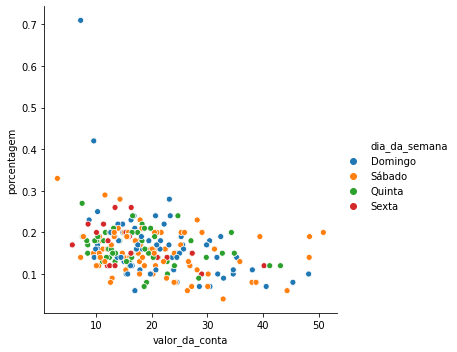

In [218]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue = 'dia_da_semana', data = gorjetas)

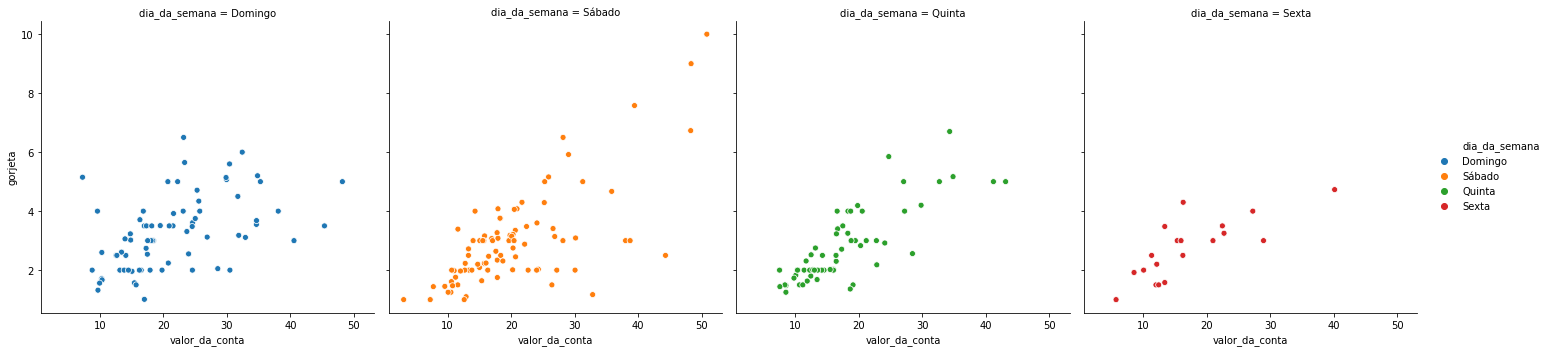

In [219]:
ax = sns.relplot(x='valor_da_conta', y='gorjeta', hue = 'dia_da_semana', col = 'dia_da_semana', data = gorjetas)


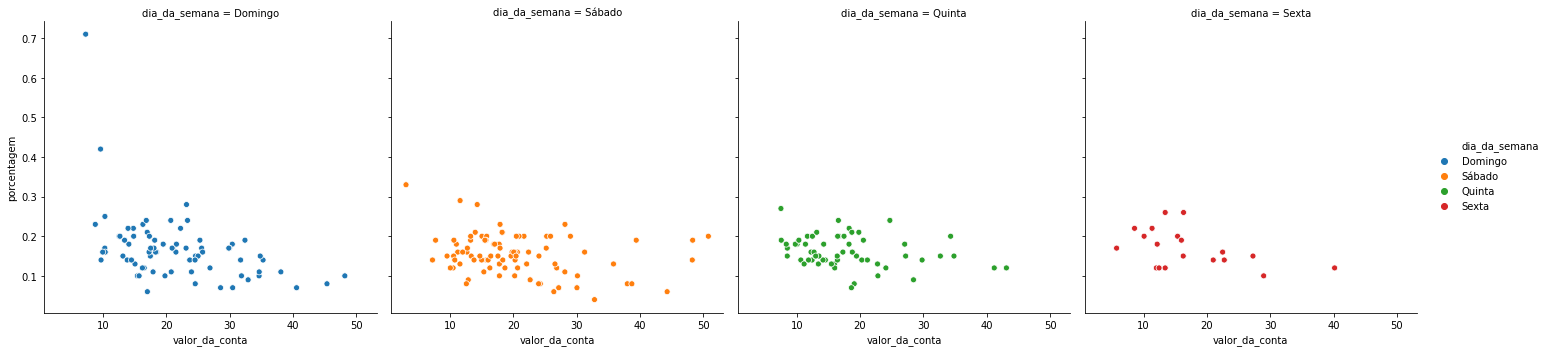

In [220]:
ax = sns.relplot(x='valor_da_conta', y='porcentagem', hue = 'dia_da_semana', col = 'dia_da_semana', data = gorjetas)

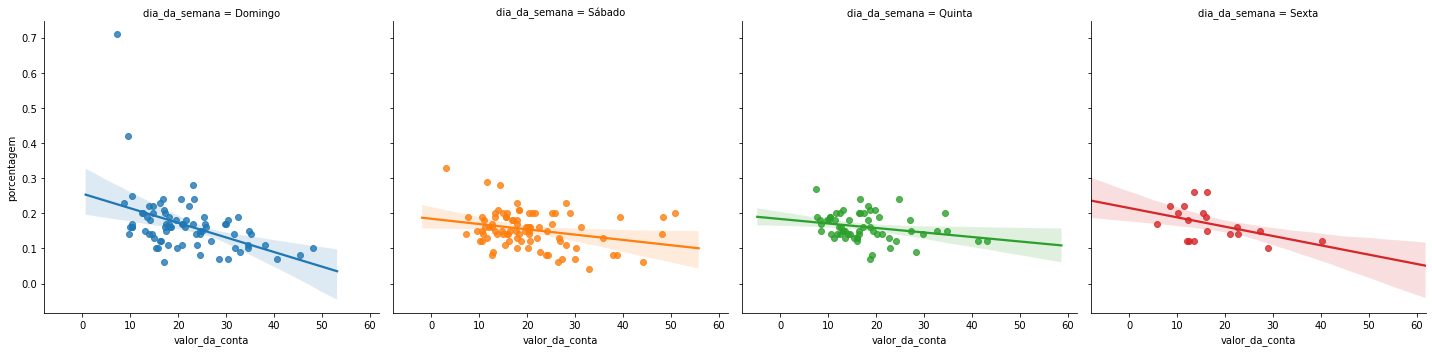

In [221]:
ax = sns.lmplot(x='valor_da_conta', y='porcentagem', hue = 'dia_da_semana', col = 'dia_da_semana', data = gorjetas)

In [222]:
media_gorjetas = gorjetas['gorjeta'].mean().round(3)

In [223]:
print('A média geral das gorjetas é {}'.format(media_gorjetas))

A média geral das gorjetas é 2.998


In [224]:
gorjetas.groupby('dia_da_semana').mean().round(2)[['valor_da_conta','gorjeta','porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.41,3.26,0.17
Quinta,17.68,2.77,0.16
Sexta,17.15,2.73,0.17
Sábado,20.44,2.99,0.15


In [225]:
print('Frequência dos dias')
gorjetas['dia_da_semana'].value_counts()

Frequência dos dias


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

### **Teste de Hipóteses**

**H<sup>0</sup>: A distribuição do valor da conta é igual no sábado e no domingo**

**H<sup>1</sup>: A distribuição do valor da conta não é igual no sábado e no domingo**

In [226]:
valor_conta_domingo = gorjetas.query('dia_da_semana == "Domingo"').valor_da_conta

In [227]:
valor_conta_sabado = gorjetas.query('dia_da_semana == "Sábado"').valor_da_conta

In [228]:
r2 = ranksums(valor_conta_domingo,valor_conta_sabado)

In [229]:
print("O valor do p-value é {}".format(r2.pvalue))

O valor do p-value é 0.3576728477868443


**A distribuição do valor da conta é igual no sábado e no domingo.**

## **Análise 4: Hora do dia**

In [230]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06


In [231]:
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

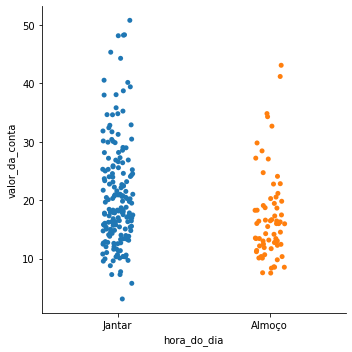

In [232]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', data = gorjetas)

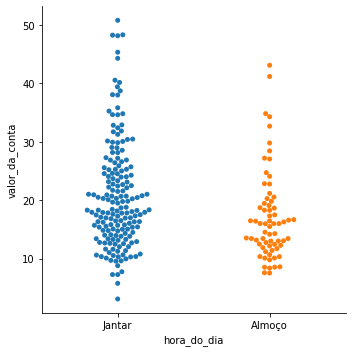

In [233]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', kind = 'swarm', data = gorjetas)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

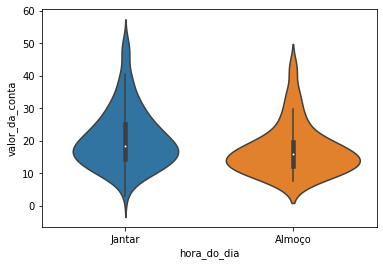

In [234]:
sns.violinplot(x='hora_do_dia', y='valor_da_conta', data = gorjetas)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

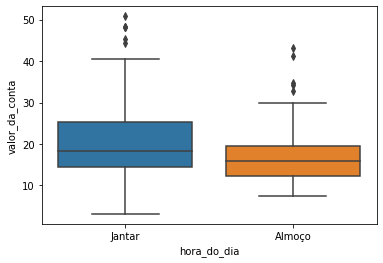

In [235]:
sns.boxplot(x='hora_do_dia', y='valor_da_conta', data = gorjetas)

In [236]:
almoco = gorjetas.query("hora_do_dia == 'Almoço' ").valor_da_conta

<AxesSubplot:xlabel='valor_da_conta'>

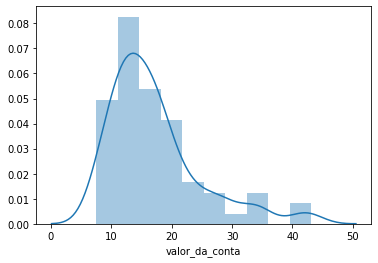

In [237]:
sns.distplot(almoco)

<AxesSubplot:xlabel='valor_da_conta'>

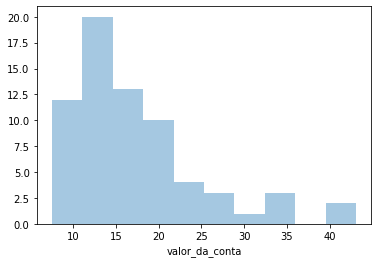

In [238]:
sns.distplot(almoco, kde = False)

In [239]:
jantar = gorjetas.query("hora_do_dia == 'Jantar' ").valor_da_conta

<AxesSubplot:xlabel='valor_da_conta'>

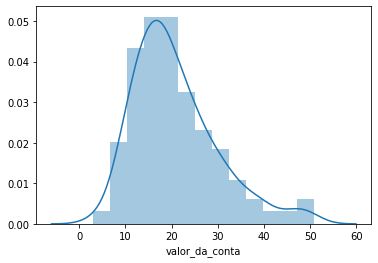

In [240]:
sns.distplot(jantar)

<AxesSubplot:xlabel='valor_da_conta'>

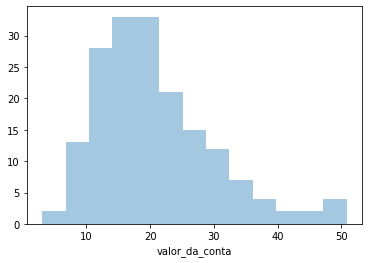

In [241]:
sns.distplot(jantar, kde = False)

In [244]:
gorjetas.groupby('hora_do_dia').mean().round(3)[['valor_da_conta','gorjeta','porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.169,2.728,0.164
Jantar,20.797,3.103,0.160


### **Teste de Hipóteses**

**H<sup>0</sup>: A distribuição do valor da conta é igual no jantar e no almoço**

**H<sup>1</sup>: A distribuição do valor da conta não é igual no jantar e no almoço**

In [246]:
r3 = ranksums(jantar,almoco)
r3

RanksumsResult(statistic=3.2438872807262955, pvalue=0.0011791039723641672)

In [248]:
print('O valor do p-value {}'.format(r3.pvalue))

O valor do p-value 0.0011791039723641672


**A distribuição do valor da conta não é igual no jantar e no almoço**

### **Teste de Hipóteses**

**H<sup>0</sup>: A distribuição da taxa da gorjeta é igual no jantar e no almoço**

**H<sup>1</sup>: A distribuição da taxa da gorjeta não é igual no jantar e no almoço**


In [250]:
porcentagem_almoco = gorjetas.query('hora_do_dia == "Almoço"').porcentagem

In [251]:
porcentagem_jantar = gorjetas.query('hora_do_dia == "Jantar"').porcentagem

In [252]:
r4 = ranksums(porcentagem_almoco,porcentagem_jantar)

In [253]:
 print('O valor do p-value {}'.format(r4.pvalue))

O valor do p-value 0.2602493995587126


**A distribuição da taxa da gorjeta é igual no jantar e no almoço.**